In [1]:
# workin on car price prediction as my task three for the oasis infobyte internship.


In [2]:
#importint the necessary libraries.

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [5]:
cars = pd.read_csv("car data.csv")
cars.head(15)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
cars.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
cars.shape

(301, 9)

In [10]:
cars.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [12]:
cars['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [13]:
cars['Car_Name'].value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

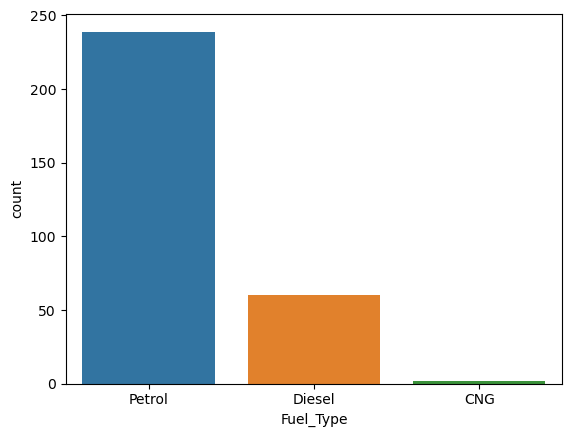

In [14]:
cars['Fuel_Type'].value_counts()
sns.countplot(x='Fuel_Type', data=cars)
plt.show()

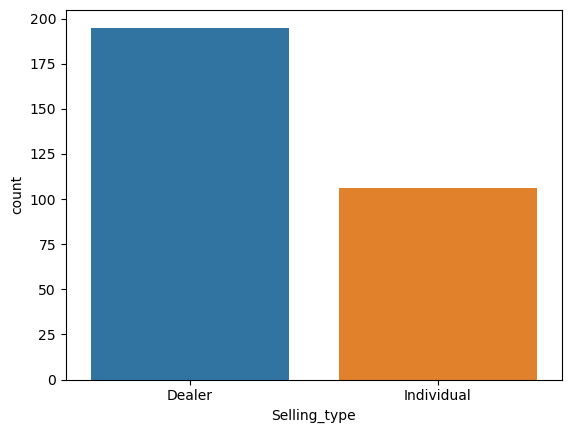

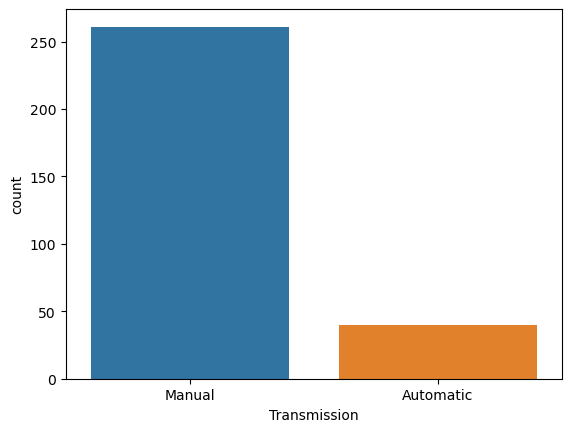

In [15]:
cars['Selling_type'].value_counts()
sns.countplot(x='Selling_type', data=cars)
plt.show()


cars['Transmission'].value_counts()
sns.countplot(x='Transmission', data=cars)
plt.show()

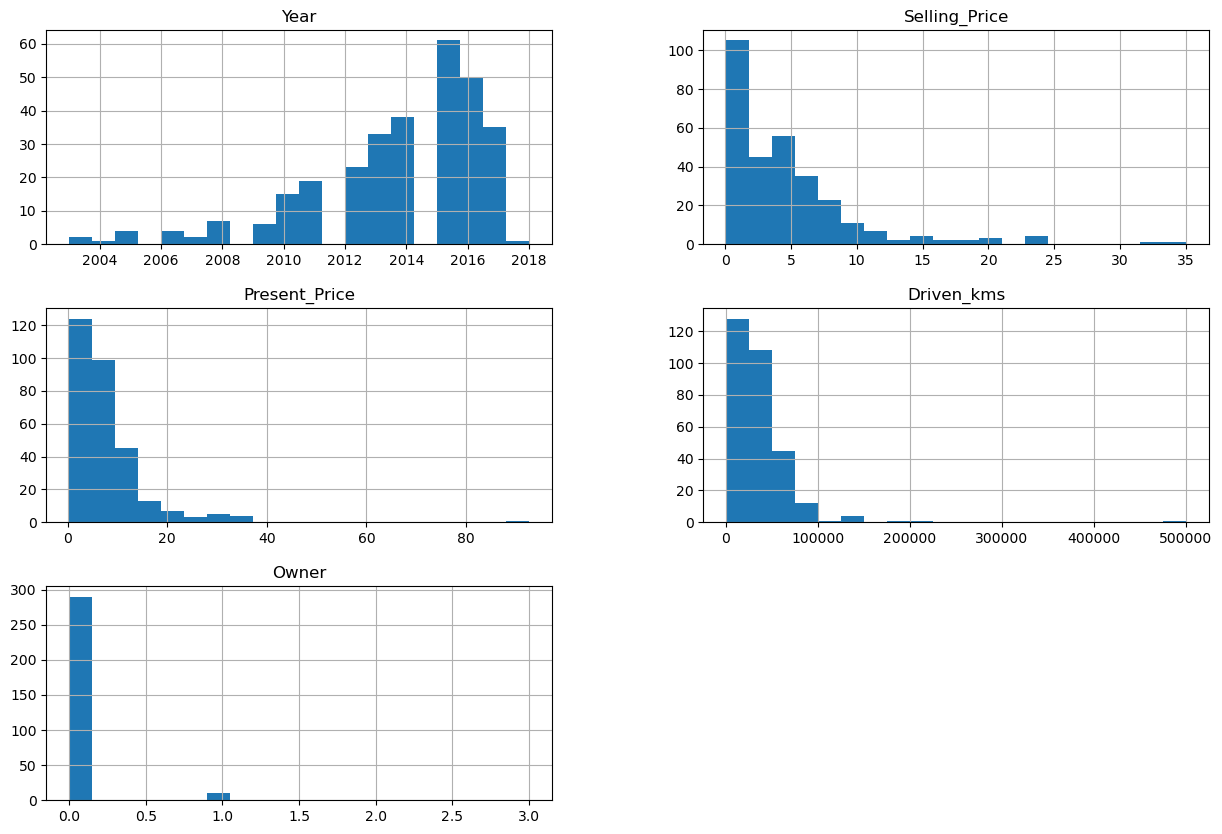

In [16]:
#Exploring Numerical features
cars.hist(bins=20, figsize=(15, 10))
plt.show()

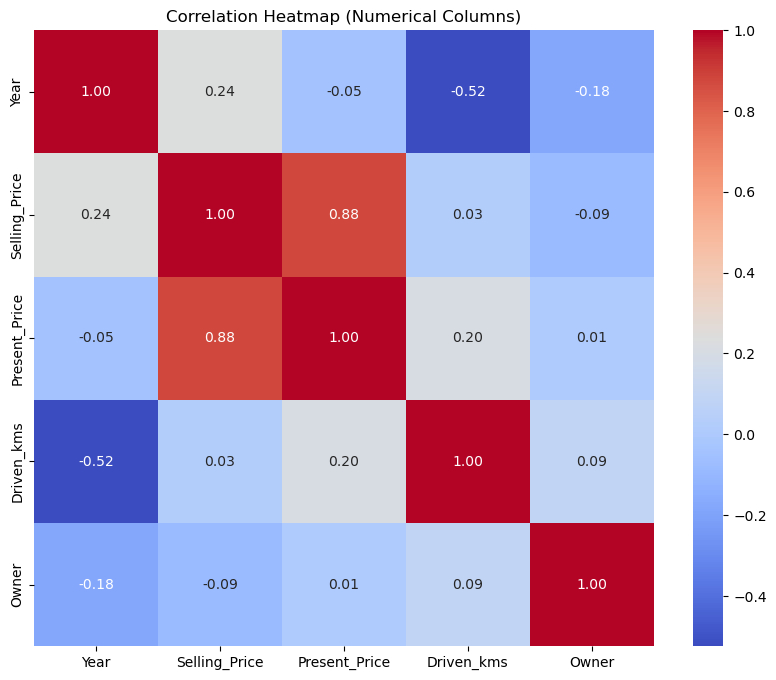

In [17]:
# Select numerical columns
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

# Create a DataFrame containing only the numerical columns
numerical_df = cars[numerical_columns]

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

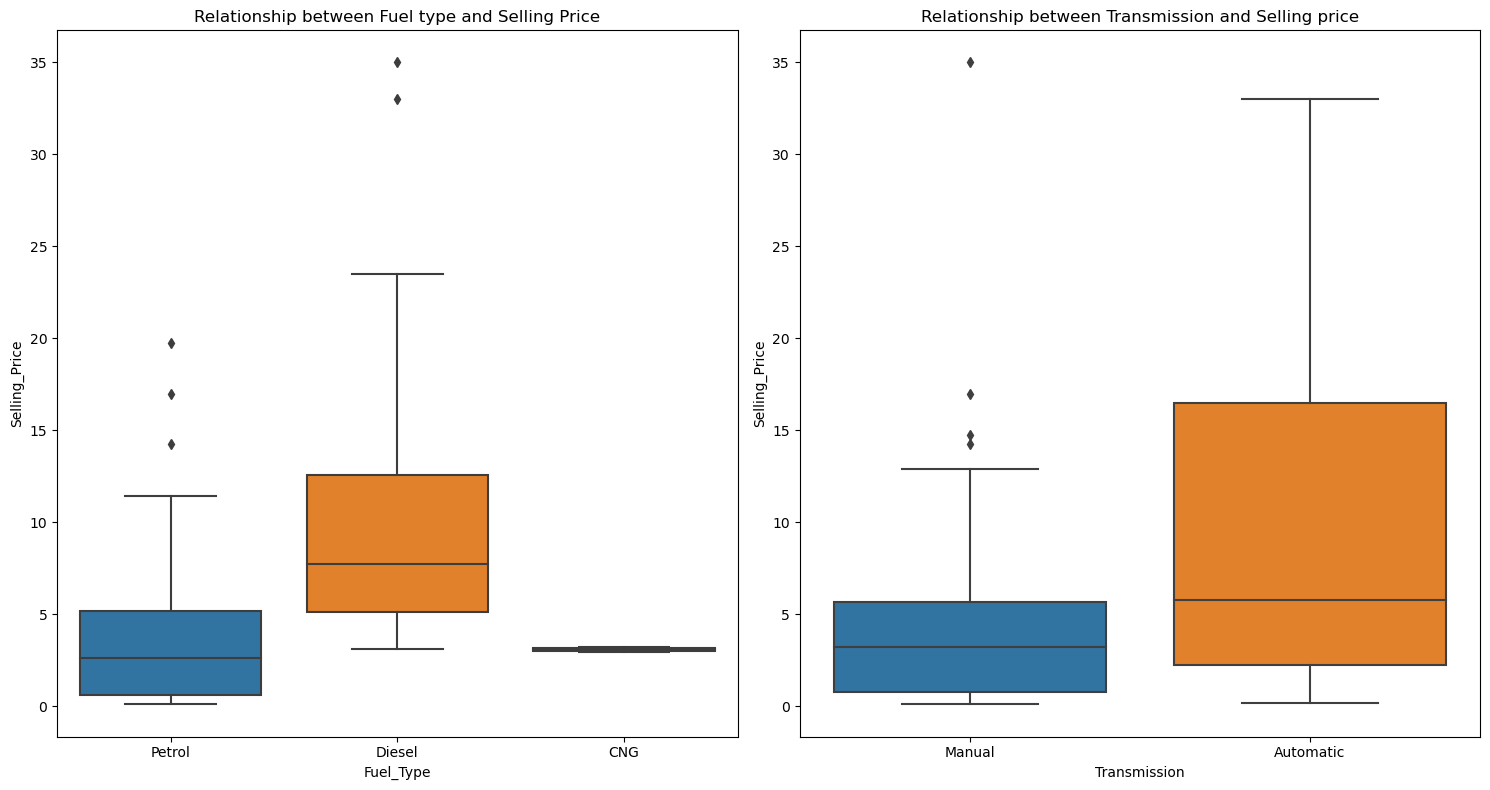

In [22]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=cars)
plt.title('Relationship between Fuel type and Selling Price')
plt.subplot(1, 2, 2)
sns.boxplot(x='Transmission', y='Selling_Price', data=cars)
plt.title('Relationship between Transmission and Selling price')
plt.tight_layout()
plt.show()

model building

In [25]:
#Split the datset into features
X = cars.drop('Selling_Price', axis=1)
y = cars['Selling_Price']

In [26]:
# One-hot encoding categorical values into numerical values
X_encoded = pd.get_dummies(X, columns=['Fuel_Type', 'Selling_type', 'Transmission','Car_Name'], prefix=['Fuel', 'Selling', 'Transmission','Cars'])

In [27]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [28]:
#Train a Regression Model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred_linear = linear_model.predict(X_test)

In [30]:
#Evaluating the Regression Model
from sklearn.metrics import mean_squared_error
from math import sqrt
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = sqrt(mse_linear)
print(f'Linear Regression RMSE: {rmse_linear}')

Linear Regression RMSE: 1.512555629630564


In [31]:
#Train a Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
y_pred_rf = rf_model.predict(X_test)

In [33]:
#Evaluating the Random Forest Model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = sqrt(mse_rf)
print(f'Random Forest RMSE: {rmse_rf}')

Random Forest RMSE: 0.8724393833985933


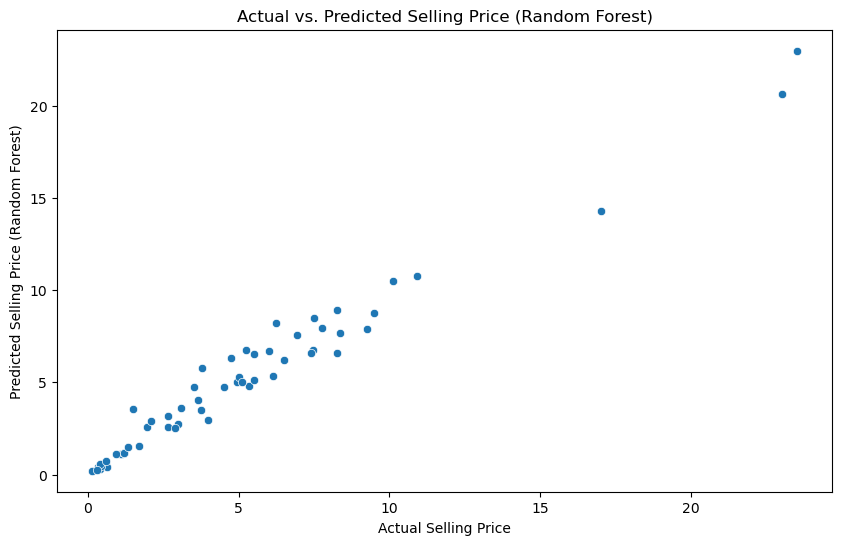

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price (Random Forest)')
plt.title('Actual vs. Predicted Selling Price (Random Forest)')
plt.show()